# Generate summary statistics for figure 3.

In [1]:
# General dependencies
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl
import os
from math import isnan

In [2]:
# This is where to find the data
data_dir = "/Volumes/condor/lthomas/Projects/Thesis_analysis/STRF_SMRF_PKLs_2512"
# Read all the pkl files in the data directory
data_files = [f for f in os.listdir(data_dir) if f.endswith('.pkl')]

# THe file that has the information about unit types
histo_file = "/Volumes/condor/lthomas/Projects/Thesis_analysis/all_units_unit_types_260130.pkl"
with open(histo_file, 'rb') as infile:
    histoDF  = pkl.load(infile)

sites = np.unique(histoDF['site'])

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/4084998930.py:9: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  histoDF  = pkl.load(infile)


In [3]:
# Open one data file to check it out
file_path = os.path.join(data_dir, data_files[0])
with open(file_path, 'rb') as infile:
    dataFrame  = pkl.load(infile)
dataFrame.keys()

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/3590087964.py:4: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_per

Index(['nwb_file_identifier', 'unit', 'r2Ceil', 'r2segModel', 'r2segIDModelLG',
       'r2segIDModelDG', 'r2segIDModelLGMPS', 'r2segIDModelDGMPS', 'r2STRF',
       'snr', 'f', 'snrEstf', 'cumInfo', 'totWeight', 'Laguerre_args',
       'dogs_args', 'pca_spect', 'pca_mps', 'strfModel', 'segModel',
       'segIDModelLG', 'segIDModelDG', 'segIDModelLGMPS', 'segIDModelDGMPS',
       'unit_id', 'error', 'nwb_file', 'bird'],
      dtype='object')

In [4]:
# Some rows have Nan?  Like row for unit_id 6 in this first file
for i, row in dataFrame.iterrows():
    if not isnan(row['snr']):
        print(row['nwb_file'], row['bird'], row['unit_id'], row['snr'], row['cumInfo'][-1])

XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 0 0.20320140862572209 12.854322601878135
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 1 0.29850280252344513 22.167637182193833
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 2 0.17277894870124805 16.187519792394898
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 3 0.08672545608805186 5.918552325438442
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 4 0.1466952034216828 7.080080433407732
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 5 0.053373375860158064 2.2277453692240137
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 7 0.3317059755697242 20.350909401328394
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 8 0.18818018625130725 5.427422546275835
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_251102 XXXLbl116XF 9 0.15365924132517145 12.522597323744318
XXXLbl116XF_site2_251017_130550_op_pb_ks4_lat_2511

In [10]:
bird = 'XXXLbl116XF'
good_site = 'XXXLbl116XF_site2_251017_130550_op_pb' 
unit = 0
# unit_type_row = histoDF[(histoDF['site'] == good_site) & (histoDF['unit_id'] == unit) & (histoDF['bird'] == bird)]
unit_type_row = histoDF[(histoDF['site'] == good_site) & (histoDF['bird'] == bird)]
print(unit_type_row['unit_id'])

1449     4
1450     5
1451     9
1452    11
1453    12
1454    13
1455    17
1456    18
1457    19
1458    21
1459    23
1460    24
1461    26
1462    27
1463    30
1464    32
1465    34
1466    35
1467    37
1468    38
1469    39
1470    40
Name: unit_id, dtype: int64


In [5]:
# Store all the data in numpy arrays

snrs = []
infos = []
units = []
birds = []
nwbFiles = []
rate = []
data_length = []
r2Ceils = []
r2Segs = []
r2segIds = []
r2STRFs = []
unit_types = []

for f in data_files:
    file_path = os.path.join(data_dir, f)
    with open(file_path, 'rb') as infile:
        dataFrame  = pkl.load(infile)
    
    for i, row in dataFrame.iterrows():
        if not isnan(row['snr']):
            snrs.append(row['snr'])
            infos.append(row['cumInfo'][-1])
            units.append(row['unit_id'])
            birds.append(row['bird'])  
            rate.append(row['segModel']['yavg'])
            data_length.append(row['totWeight'])
            nwbFiles.append(row['nwb_file'])
            r2Ceils.append(row['r2Ceil'])
            r2Segs.append(row['r2segModel'])
            r2segIds.append(row['r2segIDModelLG'])
            r2STRFs.append(row['r2STRF'])

            site_info = row['nwb_file']
            good_site = None
            for site in sites:
                if site in row['nwb_file']:
                    good_site = site
                    break
            
            unit_type_row = histoDF[(histoDF['site'] == good_site) & (histoDF['unit_id'] == row['unit_id']) & (histoDF['bird'] == row['bird'])]
            if len(unit_type_row) == 1:
                unit_types.append(unit_type_row['unit_type'].iloc[0])
            else:
                print(f"Unit type not found for bird {row['bird']}, site {good_site}, unit {row['unit_id']}")
                unit_types.append('un')

snrs = np.array(snrs)
infos = np.array(infos)
rate = np.array(rate)
data_length = np.array(data_length) 
r2Ceils = np.array(r2Ceils)
r2Segs = np.array(r2Segs)
r2segIds = np.array(r2segIds)
r2STRFs = np.array(r2STRFs)
unit_types = np.array(unit_types)

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 0
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 1
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 2
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 3
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 7
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 8
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 10
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 14
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 15
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_251017_130550_op_pb, unit 16
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site2_2

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 0
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 2
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 4
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 9
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 10
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 11
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 16
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 17
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 18
Unit type not found for bird OraGre4617M, site OraGre4617M_site3_250905_073736_op_pb, unit 23
Unit type not found for bird OraGre4617M, site OraGre4617M_site3

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 18
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 19
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 20
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 21
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 22
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 23
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 24
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 25
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 26
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 27
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240815_124122, unit 28
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d1_240

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Unit type not found for bird HpiRed7670F, site HpiRed7670F_site01_241017_141229_op_pb, unit 84
Unit type not found for bird HpiRed7670F, site HpiRed7670F_site01_241017_141229_op_pb, unit 85
Unit type not found for bird HpiRed7670F, site HpiRed7670F_site01_241017_141229_op_pb, unit 86
Unit type not found for bird HpiRed7670F, site HpiRed7670F_site01_241017_141229_op_pb, unit 90
Unit type not found for bird OraGre4617M, site OraGre4617M_site1_250904_070934_op_pb, unit 4
Unit type not found for bird OraGre4617M, site OraGre4617M_site1_250904_070934_op_pb, unit 5
Unit type not found for bird OraGre4617M, site OraGre4617M_site1_250904_070934_op_pb, unit 7
Unit type not found for bird OraGre4617M, site OraGre4617M_site1_250904_070934_op_pb, unit 15
Unit type not found for bird OraGre4617M, site OraGre4617M_site1_250904_070934_op_pb, unit 16
Unit type not found for bird OraGre4617M, site OraGre4617M_site1_250904_070934_op_pb, unit 25
Unit type not found for bird OraGre4617M, site OraGre4617M_

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 6
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 17
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 20
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 21
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 25
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 30
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 31
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 33
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 34
Unit type not found for bird XXXBlu121XF, site XXXBlu121XF_site02_250117_074609_op_pb, unit 35
Unit type not found for bird XXXBlu121XF, site XXXB

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site3_251018_082630_op_pb, unit 0
Unit type not found for bird XXXLbl116XF, site XXXLbl116XF_site3_251018_082630_op_pb, unit 1
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 0
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 1
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 2
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 3
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 4
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 5
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 6
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 7
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d4_240816_144048, unit 8
Unit type not found for bird BlaBla3736M, site BlaBla3736M

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 28
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 29
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 30
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 31
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 32
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 33
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 34
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 35
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 36
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 37
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240816_070201, unit 38
Unit type not found for bird BlaBla3736M, site BlaBla3736M_d3_240

/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_90935/2522871141.py:19: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

In [11]:
unit_types

array(['un', 'un', 'un', ..., 'un', 'un', 'un'],
      shape=(1367,), dtype='<U2')

Number of units with SNR > 0.2 and Information > 5.0 and Rate > 1.0 and Data Size > 1000: 534/1367


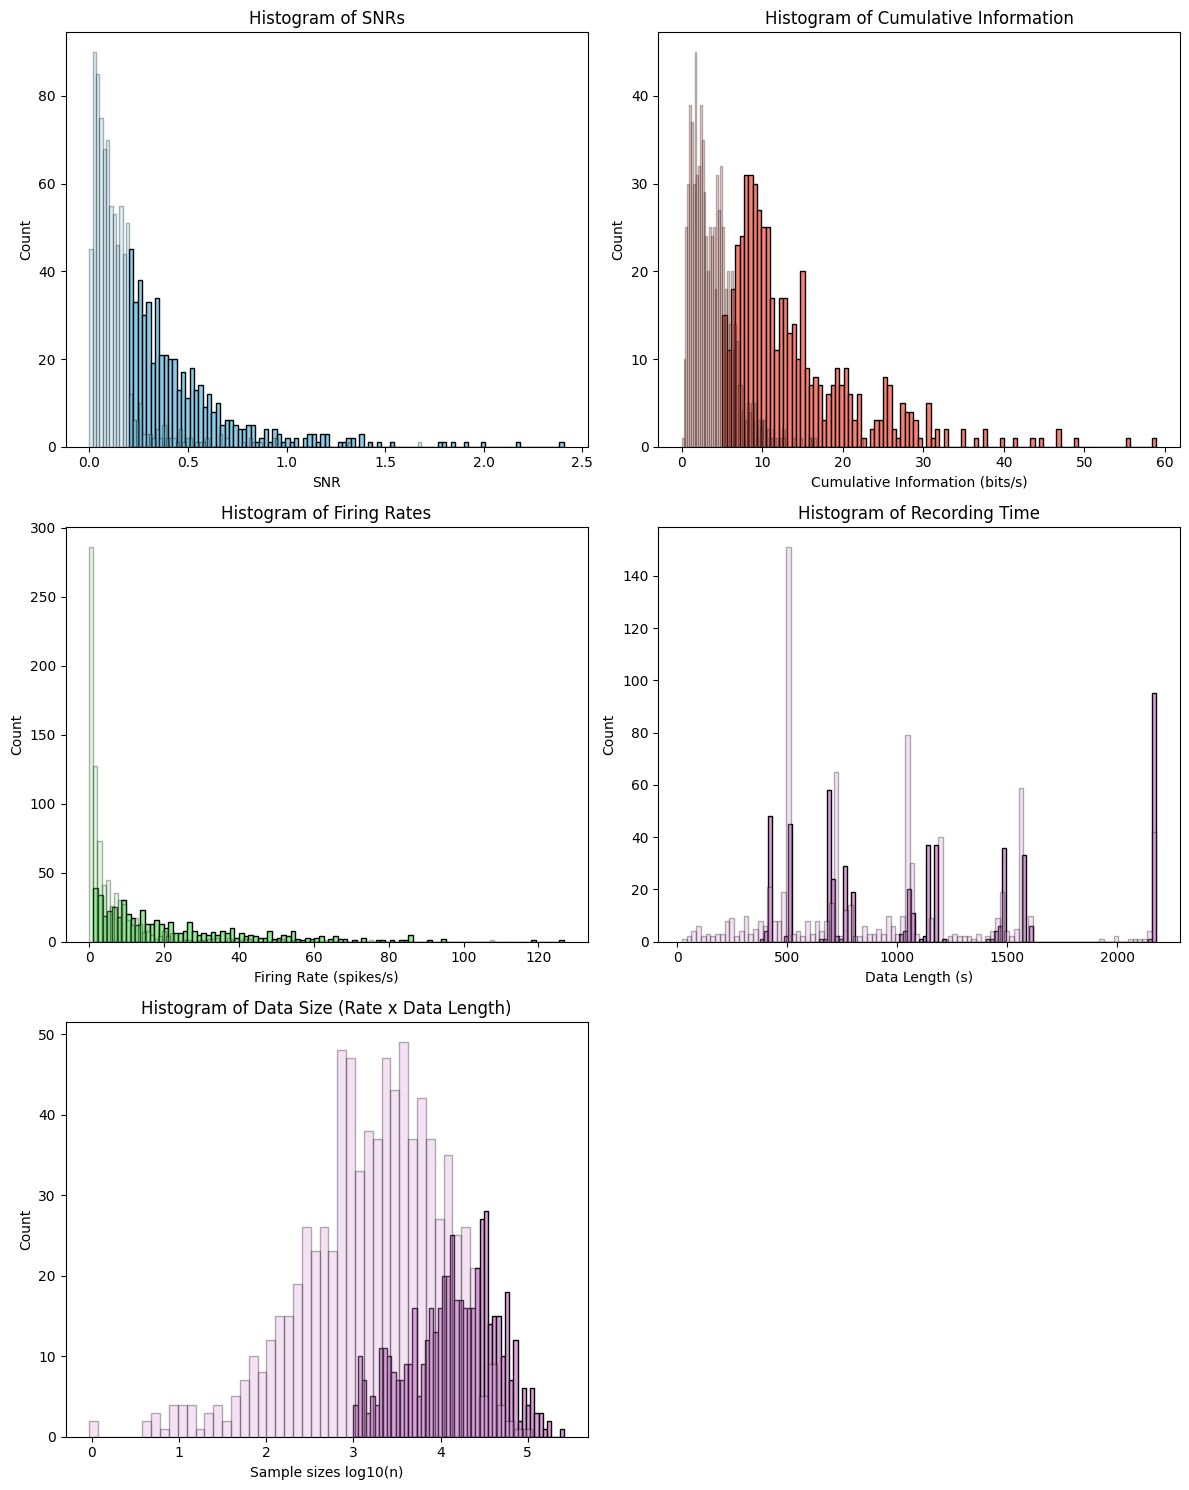

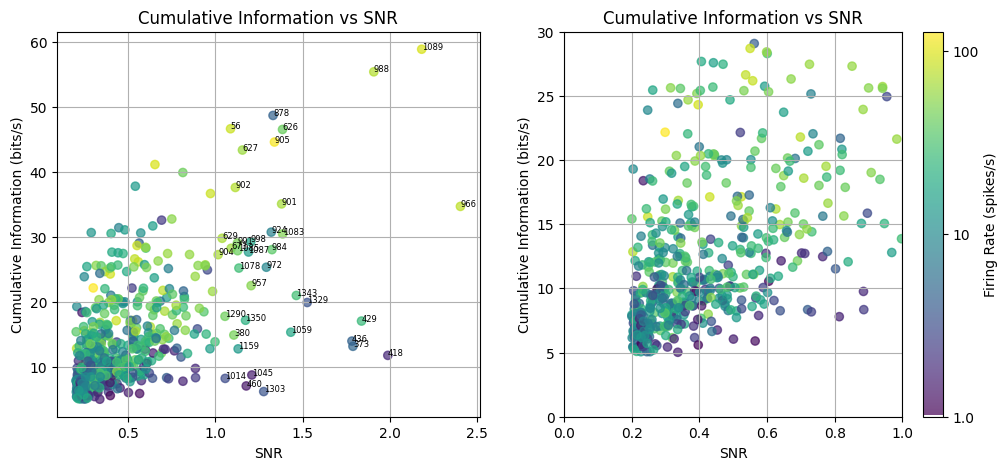

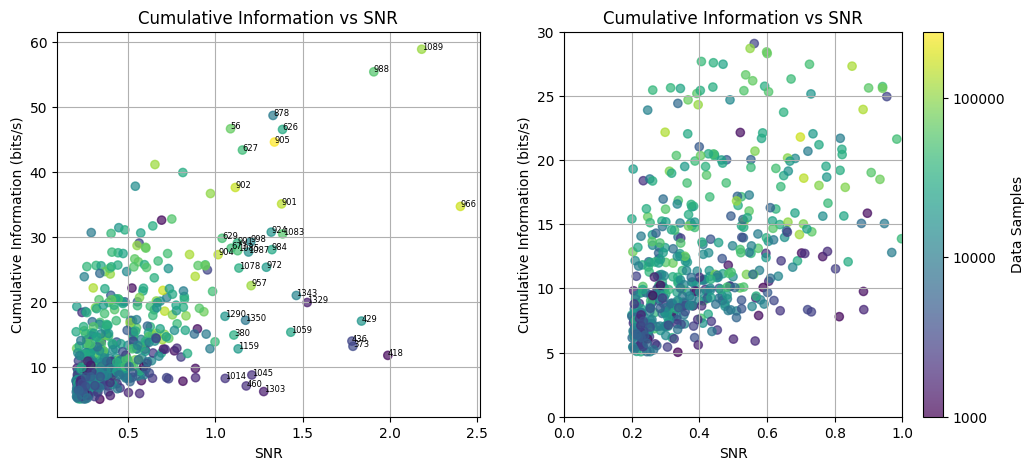

In [113]:
# Plot histograms
# We need to figure out thresholds for auditory units.  I propose this:
information_threshold = 5.0 # in bits/s
snr_threshold = 0.2 # unitless
rate_threshold = 1.0 # average evoked rate in spikes/s
data_size_threshold = 1000 # Requiring at leat 1000 spikes.

idx = (snrs > snr_threshold) & (infos > information_threshold) & (rate > rate_threshold) & (rate*data_length/1000 > data_size_threshold)
print(f"Number of units with SNR > {snr_threshold} and Information > {information_threshold} and Rate > {rate_threshold} and Data Size > {data_size_threshold}: {np.sum(idx)}/{len(snrs)}")
plt.figure(figsize=(12, 15))
plt.subplot(3, 2, 1)
plt.hist(snrs[idx], bins=100, color='skyblue', edgecolor='black')
plt.hist(snrs[~idx], bins=100, color='skyblue', edgecolor='black', alpha=0.3)
plt.title('Histogram of SNRs')
plt.xlabel('SNR')
plt.ylabel('Count')
plt.subplot(3, 2, 2)
plt.hist(infos[idx], bins=100, color='salmon', edgecolor='black')
plt.hist(infos[~idx], bins=100, color='salmon', edgecolor='black', alpha=0.3)
plt.title('Histogram of Cumulative Information')
plt.xlabel('Cumulative Information (bits/s)')
plt.ylabel('Count')
plt.subplot(3, 2, 3)
plt.hist(rate[idx], bins=100, color='lightgreen', edgecolor='black')
plt.hist(rate[~idx], bins=100, color='lightgreen', edgecolor='black', alpha=0.3)
plt.title('Histogram of Firing Rates')
plt.xlabel('Firing Rate (spikes/s)')
plt.ylabel('Count')
plt.subplot(3, 2, 4)
plt.hist(data_length[idx]/1000, bins=100, color='plum', edgecolor='black')
plt.hist(data_length[~idx]/1000, bins=100, color='plum', edgecolor='black', alpha=0.3)
plt.title('Histogram of Recording Time')
plt.xlabel('Data Length (s)')
plt.ylabel('Count')
plt.subplot(3, 2, 5)
plt.hist(np.log10(rate[idx]*data_length[idx]/1000), bins=50, color='plum', edgecolor='black')
plt.hist(np.log10(rate[~idx]*data_length[~idx]/1000), bins=50, color='plum', edgecolor='black', alpha=0.3)
plt.title('Histogram of Data Size (Rate x Data Length)')
plt.xlabel('Sample sizes log10(n)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Scatter plot of cumulative information vs SNR colored by rate

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(snrs[idx], infos[idx], c = np.log(rate[idx]), cmap ='viridis', alpha=0.7)
plt.title('Cumulative Information vs SNR')
plt.xlabel('SNR')
plt.ylabel('Cumulative Information (bits/s)')
plt.grid(True)
# Add text labels for snr> 1
for i, snr in enumerate(snrs):
    if idx[i] and snr > 1.0:
        plt.text(snrs[i], infos[i], f"{i}", fontsize=6)
plt.subplot(1,2,2)
plt.scatter(snrs[idx], infos[idx], c = np.log10(rate[idx]), cmap ='viridis', alpha=0.7)
plt.title('Cumulative Information vs SNR')
plt.xlim((0.0, 1.0))
plt.xlabel('SNR')
plt.ylim((0.0, 30.0))
plt.ylabel('Cumulative Information (bits/s)')
cbar = plt.colorbar(label='Firing Rate (spikes/s)')
tickvalues = cbar.get_ticks()
cbar.set_ticks([np.log10(rate_threshold), 1.0, 2.0])
cbar.set_ticklabels([rate_threshold, 10, 100])
plt.grid(True)

plt.show()

# Scatter plot of cumulative information vs SNR colored by square root total data 

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(snrs[idx], infos[idx], c = np.log10(rate[idx]*data_length[idx]/1000), cmap ='viridis', alpha=0.7)
plt.title('Cumulative Information vs SNR')
plt.xlabel('SNR')
plt.ylabel('Cumulative Information (bits/s)')
plt.grid(True)
# Add text labels for snr> 1
for i, snr in enumerate(snrs):
    if idx[i] and snr > 1.0:
        plt.text(snrs[i], infos[i], f"{i}", fontsize=6)
plt.subplot(1,2,2)
plt.scatter(snrs[idx], infos[idx], c = np.log10(rate[idx]*data_length[idx]/1000), cmap ='viridis', alpha=0.7)
plt.title('Cumulative Information vs SNR')
plt.xlim((0.0, 1.0))
plt.xlabel('SNR')
plt.ylim((0.0, 30.0))
plt.ylabel('Cumulative Information (bits/s)')
cbar = plt.colorbar(label='Data Samples')
tickvalues = cbar.get_ticks()
cbar.set_ticks([3.0, 4.0, 5.0])
cbar.set_ticklabels([1000, 10000, 100000])
plt.grid(True)

plt.show()

In [114]:
units_to_label = [1014, 1303]

for i_unit in units_to_label:
        print(f"Unit {i_unit} found in Bird {birds[i_unit]} - Unit {units[i_unit]} - File: {nwbFiles[i_unit]}: SNR={snrs[i_unit]}, Info={infos[i_unit]}, Rate={rate[i_unit]}, Data Length={data_length[i_unit]/1000} s")

Unit 1014 found in Bird HpiPur2667F - Unit 32 - File: HpiPur2667F_site03_240905_133829_pb_op_ks4_lat_250215: SNR=1.0560268414686038, Info=8.230935426206601, Rate=3.051791039660453, Data Length=762.926 s
Unit 1303 found in Bird BlaBla3736M - Unit 34 - File: BlaBla3736M_d2_240815_152202_ks4_lat_250215: SNR=1.277170756647766, Info=6.203464805401202, Rate=3.554376873892141, Data Length=412.23 s


/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_97728/3128599868.py:11: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

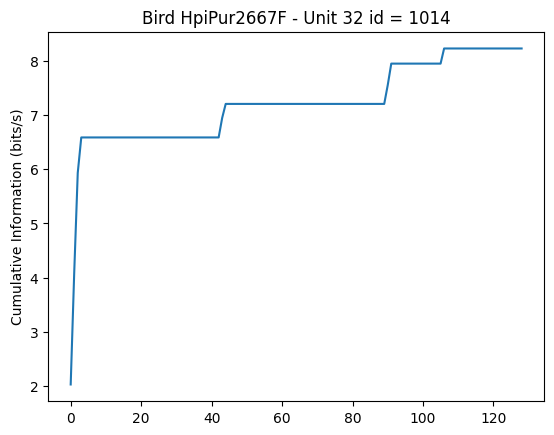

Unit 1014 found in Bird HpiPur2667F - Unit 32: SNR=1.0560268414686038, Info=8.230935426206601, Rate=3.051791039660453, Data size=2328.2907307239907 spikes


/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_97728/3128599868.py:11: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dataFrame  = pkl.load(infile)
/Users/frederictheunissen/opt/anaconda3/envs/spikesort/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_pe

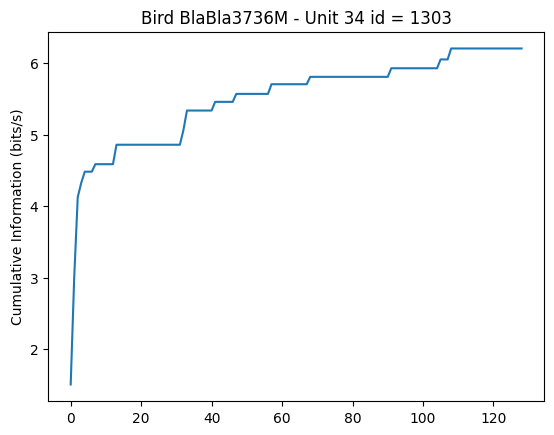

Unit 1303 found in Bird BlaBla3736M - Unit 34: SNR=1.277170756647766, Info=6.203464805401202, Rate=3.554376873892141, Data size=1465.2207787245572 spikes


In [75]:
# Plot the information for these neurons

for i_unit in units_to_label:
        bird  = birds[i_unit]
        unit = units[i_unit]

        # Read that data file and get the row. 
       
        file_path = os.path.join(data_dir, bird + '_' +nwbFiles[i_unit] + '_results.pkl')
        with open(file_path, 'rb') as infile:
                dataFrame  = pkl.load(infile)
        for i, row in dataFrame.iterrows():
                if row['unit_id'] == unit:
                        plt.figure()
                        plt.plot(row['cumInfo'])
                        plt.title(f'Bird {bird} - Unit {unit} id = {i_unit}') 
                        plt.ylabel('Cumulative Information (bits/s)')
                        plt.show()
                        print(f"Unit {i_unit} found in Bird {birds[i_unit]} - Unit {units[i_unit]}: SNR={snrs[i_unit]}, Info={infos[i_unit]}, Rate={rate[i_unit]}, Data size={rate[i_unit]*data_length[i_unit]/1000} spikes")
                        break



/var/folders/zn/qkxxn59x2712k0l7j64f7ry40000gn/T/ipykernel_97728/797883081.py:32: RuntimeWarning: divide by zero encountered in divide
  idx_model = idx & (r2Segs/r2Ceils > r2_threshold)


Number of units with good models (R2 (corrected) > 0.05): 338/534


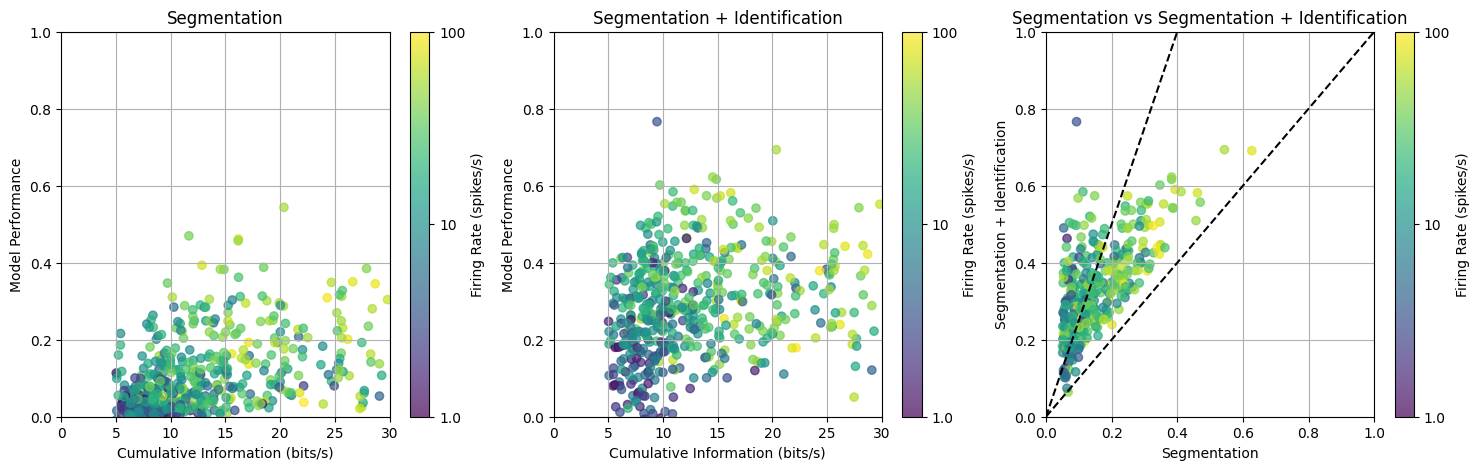

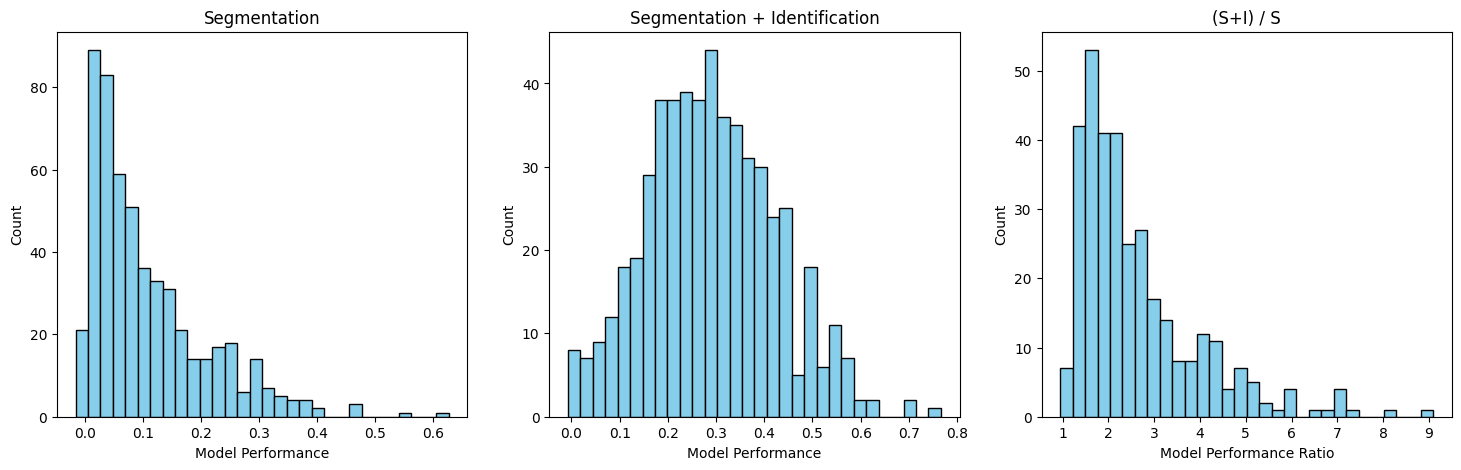

In [104]:
# Make scatter plots of model performance vs information

plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.scatter(infos[idx], r2Segs[idx]/r2Ceils[idx], c = np.log10(rate[idx]), cmap ='viridis', alpha=0.7, clim=(np.log10(rate_threshold), 2.0))
plt.title('Segmentation')
plt.xlabel('Cumulative Information (bits/s)')
plt.ylabel('Model Performance')
cbar = plt.colorbar(label='Firing Rate (spikes/s)')
tickvalues = cbar.get_ticks()
cbar.set_ticks([np.log10(rate_threshold), 1.0, 2.0])
cbar.set_ticklabels([rate_threshold, 10, 100])
plt.xlim((0.0, 30.0))
plt.ylim((0.0, 1.0))
plt.grid(True)

plt.subplot(1,3,2)
plt.scatter(infos[idx], r2segIds[idx]/r2Ceils[idx], c = np.log10(rate[idx]), cmap ='viridis', alpha=0.7, clim=(np.log10(rate_threshold), 2.0))
plt.title('Segmentation + Identification')
plt.xlabel('Cumulative Information (bits/s)')
plt.ylabel('Model Performance')
cbar = plt.colorbar(label='Firing Rate (spikes/s)')
tickvalues = cbar.get_ticks()
cbar.set_ticks([np.log10(rate_threshold), 1.0, 2.0])
cbar.set_ticklabels([rate_threshold, 10, 100])
plt.xlim((0.0, 30.0))
plt.ylim((0.0, 1.0))
plt.grid(True)

# Units predicted by encoding model
r2_threshold = 0.05
idx_model = idx & (r2Segs/r2Ceils > r2_threshold)
print(f"Number of units with good models (R2 (corrected) > {r2_threshold}): {np.sum(idx_model)}/{np.sum(idx)}")

plt.subplot(1,3,3)
plt.scatter(r2Segs[idx_model]/r2Ceils[idx_model], r2segIds[idx_model]/r2Ceils[idx_model], c = np.log10(rate[idx_model]), cmap ='viridis', alpha=0.7, clim=(np.log10(rate_threshold), 2.0))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0, 2.5], 'k--')
plt.title('Segmentation vs Segmentation + Identification')
plt.xlabel('Segmentation')
plt.ylabel('Segmentation + Identification')
cbar = plt.colorbar(label='Firing Rate (spikes/s)')
tickvalues = cbar.get_ticks()
cbar.set_ticks([np.log10(rate_threshold), 1.0, 2.0])
cbar.set_ticklabels([rate_threshold, 10, 100])
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.grid(True)

plt.show()

# Histograms of model performance

plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.hist(r2Segs[idx]/r2Ceils[idx], bins=30, color='skyblue', edgecolor='black')
plt.title('Segmentation')
plt.xlabel('Model Performance')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(r2segIds[idx]/r2Ceils[idx], bins=30, color='skyblue', edgecolor='black')
plt.title('Segmentation + Identification')
plt.xlabel('Model Performance')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(r2segIds[idx_model]/r2Segs[idx_model], bins=30, color='skyblue', edgecolor='black')
plt.title('(S+I) / S')
plt.xlabel('Model Performance Ratio')
plt.ylabel('Count')


plt.show()

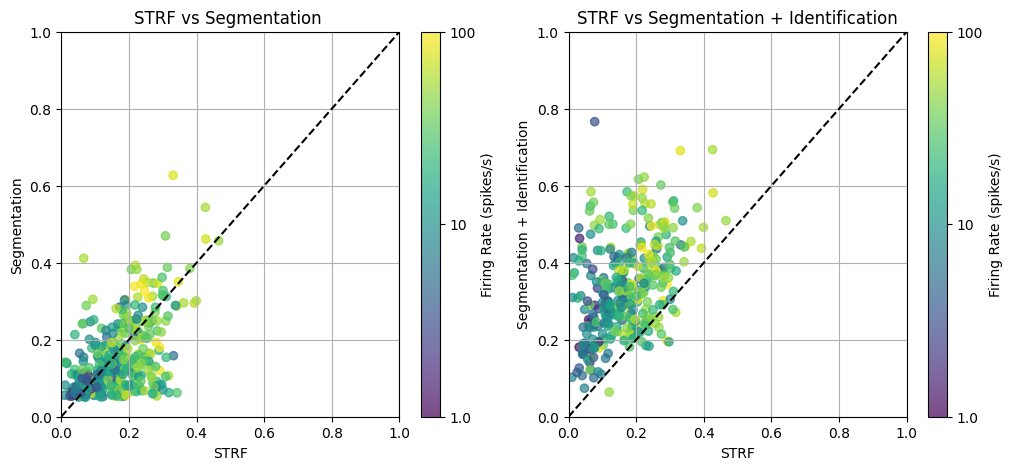

In [98]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(r2STRFs[idx_model]/r2Ceils[idx_model], r2Segs[idx_model]/r2Ceils[idx_model], c = np.log10(rate[idx_model]), cmap ='viridis', alpha=0.7, clim=(np.log10(rate_threshold), 2.0))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('STRF vs Segmentation ')
plt.xlabel('STRF')
plt.ylabel('Segmentation')
cbar = plt.colorbar(label='Firing Rate (spikes/s)')
tickvalues = cbar.get_ticks()
cbar.set_ticks([np.log10(rate_threshold), 1.0, 2.0])
cbar.set_ticklabels([rate_threshold, 10, 100])
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(r2STRFs[idx_model]/r2Ceils[idx_model], r2segIds[idx_model]/r2Ceils[idx_model], c = np.log10(rate[idx_model]), cmap ='viridis', alpha=0.7, clim=(np.log10(rate_threshold), 2.0))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('STRF vs Segmentation + Identification')
plt.xlabel('STRF')
plt.ylabel('Segmentation + Identification')
cbar = plt.colorbar(label='Firing Rate (spikes/s)')
tickvalues = cbar.get_ticks()
cbar.set_ticks([np.log10(rate_threshold), 1.0, 2.0])
cbar.set_ticklabels([rate_threshold, 10, 100])
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.grid(True)

plt.show()